# Linear Regression

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
from sklearn.model_selection import train_test_split

In [11]:
data = pd.read_csv('data.csv')

In [12]:
data.head(5)

,age,height_cm,weight_kgs,nationality,overall_rating,preferred_foot,weak_foot(1-5),skill_moves(1-5),crossing,finishing,...,positions_GK,positions_LB,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST
0,27,177.606642,76.2,Denmark,88,1,5,4,88,81,...,0,0,0,0,0,0,1,0,0,0
1,25,190.500000,83.9,France,88,1,4,5,80,75,...,0,0,0,0,0,0,0,0,0,0
2,27,162.560000,59.0,Italy,88,1,4,4,86,77,...,0,0,0,1,0,0,0,0,0,1
3,27,187.960000,88.9,Senegal,88,1,3,2,30,22,...,0,0,0,0,0,0,0,0,0,0
4,27,193.040000,92.1,Netherlands,88,1,3,2,53,52,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X = data.drop('overall_rating', axis=1)
y = data['overall_rating']
seed = 42
val_size = 0.2
test_size = 0.125
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=seed)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=seed)

In [14]:
X_test.shape

(1795, 52)

In [15]:
X.head()

,age,height_cm,weight_kgs,nationality,preferred_foot,weak_foot(1-5),skill_moves(1-5),crossing,finishing,heading_accuracy,...,positions_GK,positions_LB,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST
0,27,177.606642,76.2,Denmark,1,5,4,88,81,52,...,0,0,0,0,0,0,1,0,0,0
1,25,190.500000,83.9,France,1,4,5,80,75,75,...,0,0,0,0,0,0,0,0,0,0
2,27,162.560000,59.0,Italy,1,4,4,86,77,56,...,0,0,0,1,0,0,0,0,0,1
3,27,187.960000,88.9,Senegal,1,3,2,30,22,83,...,0,0,0,0,0,0,0,0,0,0
4,27,193.040000,92.1,Netherlands,1,3,2,53,52,83,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=['nationality'])
encoder.fit(X_train, y_train)
X_train_encoded = encoder.transform(X_train)
X_val_encoded = encoder.transform(X_val)

scaler = StandardScaler()
scaler.fit(X_train_encoded, y_train)
X_train_scaled = scaler.transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

## Normal LR

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_val_pred = lr.predict(X_val_scaled)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("\n=== Đánh Giá Mô Hình Linear Regression ===")
print("**Trên Tập Huấn Luyện:**")
print(f"Mean Absolute Error (MAE): {mae_train:.3f}")
print(f"Mean Squared Error (MSE): {mse_train:.3f}")
print(f"R² Score: {r2_train:.3f}")

print("\n**Trên Tập Kiểm Tra:**")
print(f"Mean Absolute Error (MAE): {mae_val:.3f}")
print(f"Mean Squared Error (MSE): {mse_val:.3f}")
print(f"R² Score: {r2_val:.3f}")


=== Đánh Giá Mô Hình Linear Regression ===
**Trên Tập Huấn Luyện:**
Mean Absolute Error (MAE): 2.232
Mean Squared Error (MSE): 8.838
R² Score: 0.817

**Trên Tập Kiểm Tra:**
Mean Absolute Error (MAE): 2.269
Mean Squared Error (MSE): 9.052
R² Score: 0.814


# SVM

In [30]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled, y_train)

y_train_pred = svr.predict(X_train_scaled)
y_val_pred = svr.predict(X_val_scaled)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("\n=== Đánh Giá Mô Hình SVM ===")
print("**Trên Tập Huấn Luyện:**")
print(f"Mean Absolute Error (MAE): {mae_train:.3f}")
print(f"Mean Squared Error (MSE): {mse_train:.3f}")
print(f"R² Score: {r2_train:.3f}")

print("\n**Trên Tập Kiểm Tra:**")
print(f"Mean Absolute Error (MAE): {mae_val:.3f}")
print(f"Mean Squared Error (MSE): {mse_val:.3f}")
print(f"R² Score: {r2_val:.3f}")


=== Đánh Giá Mô Hình SVM ===
**Trên Tập Huấn Luyện:**
Mean Absolute Error (MAE): 1.058
Mean Squared Error (MSE): 3.541
R² Score: 0.927

**Trên Tập Kiểm Tra:**
Mean Absolute Error (MAE): 1.178
Mean Squared Error (MSE): 3.685
R² Score: 0.924


In [32]:
from sklearn.model_selection import GridSearchCV


svr = SVR()

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
}

grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='r2',         
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation R² Score: {grid_search.best_score_:.3f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation R² Score: 0.931


In [33]:
best_svr = grid_search.best_estimator_

y_train_pred = best_svr.predict(X_train_scaled)
y_val_pred = best_svr.predict(X_val_scaled)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("\n=== Đánh Giá Mô Hình SVR Sau Khi GridSearch ===")
print("**Trên Tập Huấn Luyện:**")
print(f"Mean Absolute Error (MAE): {mae_train:.3f}")
print(f"Mean Squared Error (MSE): {mse_train:.3f}")
print(f"R² Score: {r2_train:.3f}")

print("\n**Trên Tập Kiểm Tra:**")
print(f"Mean Absolute Error (MAE): {mae_val:.3f}")
print(f"Mean Squared Error (MSE): {mse_val:.3f}")
print(f"R² Score: {r2_val:.3f}")



=== Đánh Giá Mô Hình SVR Sau Khi GridSearch ===
**Trên Tập Huấn Luyện:**
Mean Absolute Error (MAE): 0.637
Mean Squared Error (MSE): 2.260
R² Score: 0.953

**Trên Tập Kiểm Tra:**
Mean Absolute Error (MAE): 0.990
Mean Squared Error (MSE): 2.947
R² Score: 0.939


In [34]:
import joblib

joblib.dump(best_svr, 'svr_model.pkl')
print("Mô hình SVR đã được lưu thành công dưới tên 'svr_model.pkl'")

Mô hình SVR đã được lưu thành công dưới tên 'svr_model.pkl'


In [37]:
svr = joblib.load('svr_model.pkl')

print("Mô hình SVR đã được tải lại thành công.")

Mô hình SVR đã được tải lại thành công.


In [38]:
X_test_encoded = encoder.transform(X_test)
X_test_scaled = scaler.transform(X_test_encoded)

y_test_pred = svr.predict(X_test_scaled)
mae_val = mean_absolute_error(y_test, y_test_pred)
mse_val = mean_squared_error(y_test, y_test_pred)
r2_val = r2_score(y_test, y_test_pred)

print("\n=== Đánh Giá Mô Hình SVR Sau Khi GridSearch ===")
print("**Trên test:**")
print(f"Mean Absolute Error (MAE): {mae_train:.3f}")
print(f"Mean Squared Error (MSE): {mse_train:.3f}")
print(f"R² Score: {r2_train:.3f}")



=== Đánh Giá Mô Hình SVR Sau Khi GridSearch ===
**Trên test:**
Mean Absolute Error (MAE): 0.637
Mean Squared Error (MSE): 2.260
R² Score: 0.953


In [ ]:
svr = joblib.load('svr_model.pkl')
print("Mô hình SVR đã được tải lại thành công.")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_val_loaded = mean_absolute_error(y_val, y_val_pred_loaded)
mse_val_loaded = mean_squared_error(y_val, y_val_pred_loaded)
r2_val_loaded = r2_score(y_val, y_val_pred_loaded)

print("\n=== Đánh Giá Mô Hình SVR Đã Lưu và Tải Lại ===")
print(f"Mean Absolute Error (MAE): {mae_val_loaded:.3f}")
print(f"Mean Squared Error (MSE): {mse_val_loaded:.3f}")
print(f"R² Score: {r2_val_loaded:.3f}")

# XGBOOST

In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
y_train_pred = xgb.predict(X_train_scaled)
y_val_pred = xgb.predict(X_val_scaled)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("\n=== Đánh Giá Mô Hình XGBoost ===")
print("**Trên Tập Huấn Luyện:**")
print(f"Mean Absolute Error (MAE): {mae_train:.3f}")
print(f"Mean Squared Error (MSE): {mse_train:.3f}")
print(f"R² Score: {r2_train:.3f}")

print("\n**Trên Tập Kiểm Tra:**")
print(f"Mean Absolute Error (MAE): {mae_val:.3f}")
print(f"Mean Squared Error (MSE): {mse_val:.3f}")
print(f"R² Score: {r2_val:.3f}")


=== Đánh Giá Mô Hình XGBoost ===
**Trên Tập Huấn Luyện:**
Mean Absolute Error (MAE): 0.593
Mean Squared Error (MSE): 0.616
R² Score: 0.987

**Trên Tập Kiểm Tra:**
Mean Absolute Error (MAE): 1.286
Mean Squared Error (MSE): 4.000
R² Score: 0.918


In [19]:

from sklearn.model_selection import RandomizedSearchCV
xgb_params = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7, 9],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_random = RandomizedSearchCV(
    xgb_model,
    param_distributions=xgb_params,
    n_iter=20,
    cv=5,
    verbose=1,
    scoring='m',
    random_state=42,
    n_jobs=-1  # Sử dụng tất cả các CPU
)

xgb_random.fit(X_train_scaled, y_train)
print(f"Best parameters for XGBoost: {xgb_random.best_params_}")
print(f"Best CV R² Score for XGBoost: {xgb_random.best_score_:.3f}")

AttributeError: 'XGBRegressor' object has no attribute 'XGBRegressor'

In [68]:
y_train_pred_xgb = xgb_random.predict(X_train_scaled)
y_val_pred_xgb = xgb_random.predict(X_val_scaled)

mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

mae_val_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
mse_val_xgb = mean_squared_error(y_val, y_val_pred_xgb)
r2_val_xgb = r2_score(y_val, y_val_pred_xgb)

print("\n=== XGBoost Regression ===")
print("**Trên Tập Huấn Luyện:**")
print(f"Mean Absolute Error (MAE): {mae_train_xgb:.3f}")
print(f"Mean Squared Error (MSE): {mse_train_xgb:.3f}")
print(f"R² Score: {r2_train_xgb:.3f}")

print("\n**Trên Tập Kiểm Tra:**")
print(f"Mean Absolute Error (MAE): {mae_val_xgb:.3f}")
print(f"Mean Squared Error (MSE): {mse_val_xgb:.3f}")
print(f"R² Score: {r2_val_xgb:.3f}")



=== XGBoost Regression ===
**Trên Tập Huấn Luyện:**
Mean Absolute Error (MAE): 0.593
Mean Squared Error (MSE): 0.616
R² Score: 0.987

**Trên Tập Kiểm Tra:**
Mean Absolute Error (MAE): 1.286
Mean Squared Error (MSE): 4.000
R² Score: 0.918


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 5, 10],
}

grid_search = GridSearchCV(xgb.XGBRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'reg_alpha': 1, 'reg_lambda': 1}


In [ ]:
best_svr = grid_search.best_estimator_

y_train_pred = best_svr.predict(X_train_scaled)
y_val_pred = best_svr.predict(X_val_scaled)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("\n=== Đánh Giá Mô Hình SVR Sau Khi GridSearch ===")
print("**Trên Tập Huấn Luyện:**")
print(f"Mean Absolute Error (MAE): {mae_train:.3f}")
print(f"Mean Squared Error (MSE): {mse_train:.3f}")
print(f"R² Score: {r2_train:.3f}")

print("\n**Trên Tập Kiểm Tra:**")
print(f"Mean Absolute Error (MAE): {mae_val:.3f}")
print(f"Mean Squared Error (MSE): {mse_val:.3f}")
print(f"R² Score: {r2_val:.3f}")


In [95]:
xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.05, subsample=0.8,colsample_bytree=0.8, reg_alpha=1, reg_lambda=1, gamma=5)

In [96]:
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [97]:
y_train_pred_xgb = xgb.predict(X_train_scaled)
y_val_pred_xgb = xgb.predict(X_val_scaled)

mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

mae_val_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
mse_val_xgb = mean_squared_error(y_val, y_val_pred_xgb)
r2_val_xgb = r2_score(y_val, y_val_pred_xgb)

print("\n=== XGBoost Regression ===")
print("**Trên Tập Huấn Luyện:**")
print(f"Mean Absolute Error (MAE): {mae_train_xgb:.3f}")
print(f"Mean Squared Error (MSE): {mse_train_xgb:.3f}")
print(f"R² Score: {r2_train_xgb:.3f}")

print("\n**Trên Tập Kiểm Tra:**")
print(f"Mean Absolute Error (MAE): {mae_val_xgb:.3f}")
print(f"Mean Squared Error (MSE): {mse_val_xgb:.3f}")
print(f"R² Score: {r2_val_xgb:.3f}")



=== XGBoost Regression ===
**Trên Tập Huấn Luyện:**
Mean Absolute Error (MAE): 0.686
Mean Squared Error (MSE): 0.844
R² Score: 0.983

**Trên Tập Kiểm Tra:**
Mean Absolute Error (MAE): 1.135
Mean Squared Error (MSE): 3.323
R² Score: 0.932


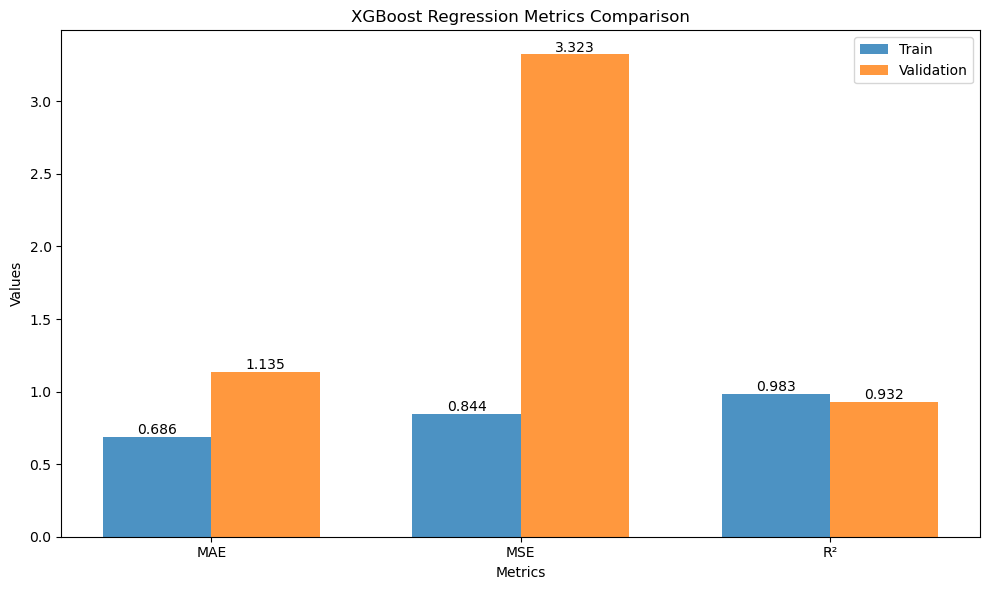

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
metrics = ['MAE', 'MSE', 'R²']
train_metrics = [mae_train_xgb, mse_train_xgb, r2_train_xgb]
val_metrics = [mae_val_xgb, mse_val_xgb, r2_val_xgb]

x = np.arange(len(metrics))  # the label locations

# Plot MAE, MSE, R² for train and validation
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
ax.bar(x - bar_width / 2, train_metrics, bar_width, label='Train', alpha=0.8)
ax.bar(x + bar_width / 2, val_metrics, bar_width, label='Validation', alpha=0.8)

# Add text for labels, title and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('XGBoost Regression Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate values
for i, v in enumerate(train_metrics):
    ax.text(i - bar_width / 2, v + 0.02, f'{v:.3f}', ha='center')
for i, v in enumerate(val_metrics):
    ax.text(i + bar_width / 2, v + 0.02, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()
